# Exercise: 
b) extend the notebook to include RNN and LSTM networks with the same or different examples

## Prerequisites: Collect and pre-process data

In [5]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

In [6]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape input data to (batch_size, timesteps, input_dim)
X_train = X_train.reshape(X_train.shape[0], 28, 28) / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28) / 255.0

# Convert labels to one-hot vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Start with same example for the RNN networks

In [7]:
from keras.layers import Dense, SimpleRNN
from keras.models import Sequential

# Define RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(28, 28)))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate model
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0933 - accuracy: 0.9731 - val_loss: 0.1193 - val_accuracy: 0.9667
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0921 - accuracy: 0.9732 - val_loss: 0.1102 - val_accuracy: 0.9688
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0868 - accuracy: 0.9744 - val_loss: 0.1207 - val_accuracy: 0.9673
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0896 - accuracy: 0.9737 - val_loss: 0.1122 - val_accuracy: 0.9686
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0885 - accuracy: 0.9738 - val_loss: 0.1151 - val_accuracy: 0.9686
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0809 - accuracy: 0.9771 - val_loss: 0.1108 - val_accuracy: 0.9694
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0839 - accuracy: 0.9755 - val_loss: 0.1251 - val_accuracy: 0.9653

In [12]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10835982859134674
Test accuracy: 0.9703999757766724


##Plot training and validation accuracy over epochs

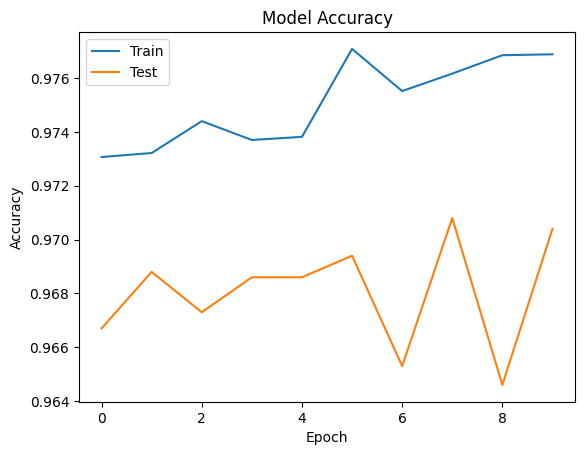

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##  Plot training and validation loss over epochs

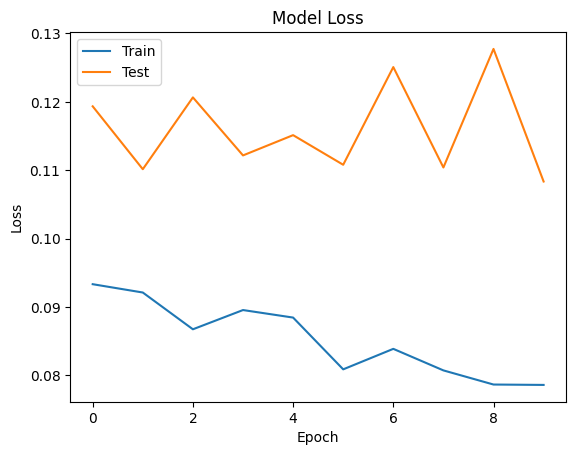

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Start with same example for the LSTM networks

## Define LSTM model

In [16]:
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(units=64, input_shape=(28, 28)))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train model

In [17]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 31s 61ms/step - loss: 0.6711 - accuracy: 0.7834 - val_loss: 0.2312 - val_accuracy: 0.9307
Epoch 2/10
469/469 [==============================] - 24s 52ms/step - loss: 0.1950 - accuracy: 0.9411 - val_loss: 0.1550 - val_accuracy: 0.9513
Epoch 3/10
469/469 [==============================] - 24s 52ms/step - loss: 0.1369 - accuracy: 0.9584 - val_loss: 0.1148 - val_accuracy: 0.9646
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1109 - accuracy: 0.9670 - val_loss: 0.1116 - val_accuracy: 0.9655
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0917 - accuracy: 0.9729 - val_loss: 0.0879 - val_accuracy: 0.9727
Epoch 6/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0804 - accuracy: 0.9760 - val_loss: 0.0948 - val_accuracy: 0.9703
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.0753 - val_accuracy:

## Evaluate model

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0652066171169281
Test accuracy: 0.980400025844574


## Plot training and validation accuracy over epochs

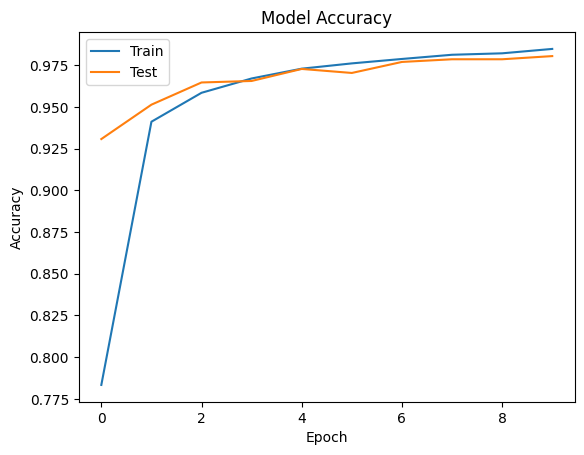

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Plot training and validation loss over epochs

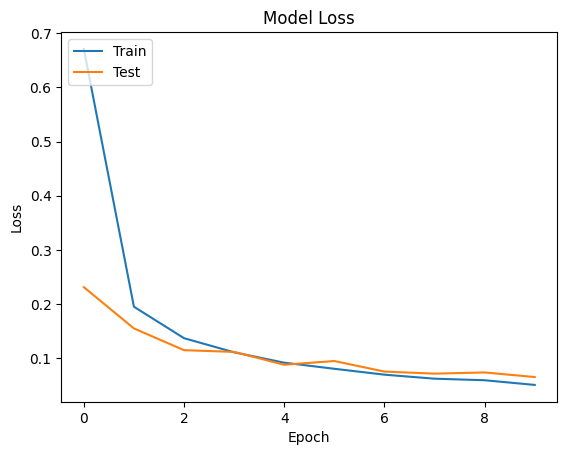

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()